In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Rating and Reviews.csv',encoding='latin-1')
df.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,This is the best laptop in this range.I reciev...
1,1,5,Good product as used of now.... Everything is ...
2,2,5,AWESOME LAPTOP. It supports many high spec gam...
3,3,4,RAM upgrade is must do because the useable RAM...
4,4,4,For that price... it's exceptionally good. Pla...


In [3]:
df.shape

(22402, 3)

Observation:

There are 22402 rows and 3 columns present in our dataset.

In [4]:
#dropping the Unnamed:  because of there are no need of 0 column
df.drop('Unnamed: 0', axis =1, inplace = True)

In [5]:
df.head()

,Ratings,Full_review
0,5,This is the best laptop in this range.I reciev...
1,5,Good product as used of now.... Everything is ...
2,5,AWESOME LAPTOP. It supports many high spec gam...
3,4,RAM upgrade is must do because the useable RAM...
4,4,For that price... it's exceptionally good. Pla...


In [6]:
print("Rating Counts",' \n',df.Ratings.value_counts())

Rating Counts  
 5    11818
4     4190
1     3306
3     1973
2     1115
Name: Ratings, dtype: int64


Observation:

Maximum, 11818 number of ratings present is of 5 star and minimum, 1115 is of 2 star.

In [7]:
def plot_labels(Rating, title=None):
  ds_labels = Rating["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

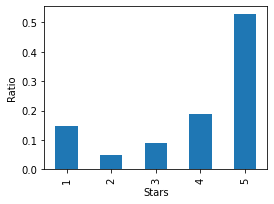

In [8]:
plot_labels(df, "stars")

Ovservation :

The dataset is showing imbalanced.

In [9]:
df['length']=df.Full_review.str.len()
df.head()

,Ratings,Full_review,length
0,5,This is the best laptop in this range.I reciev...,500
1,5,Good product as used of now.... Everything is ...,271
2,5,AWESOME LAPTOP. It supports many high spec gam...,96
3,4,RAM upgrade is must do because the useable RAM...,502
4,4,For that price... it's exceptionally good. Pla...,342


Now we create another column of length based on the length of reviews.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22402 entries, 0 to 22401
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      22402 non-null  int64 
 1   Full_review  22402 non-null  object
 2   length       22402 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 525.2+ KB


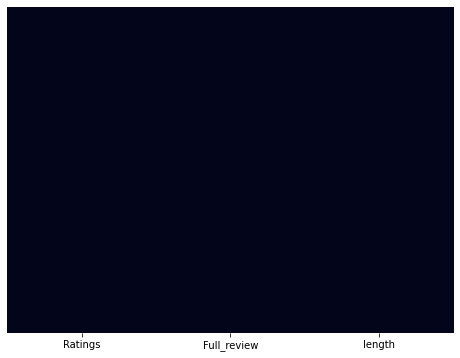

In [11]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Observation:

Thus we confirm that there are no missing values present in our dataset.

In [12]:
#convert text to lowercase
df['Full_review']=df['Full_review'].str.lower()

In [13]:
df['Full_review']=df['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

In [14]:
df['Full_review']=df['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

In [15]:
df['Full_review']=df['Full_review'].str.replace(r'£|\$', 'dollers')

In [16]:
df['Full_review']=df['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

In [17]:
df['Full_review']=df['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [18]:
#remove punctuation
df['Full_review']=df['Full_review'].str.replace(r'[^\w\d\s]', ' ')


In [19]:
#replace whitespace between terms with a single space
df['Full_review']=df['Full_review'].str.replace(r'\s+', ' ')

In [20]:
#Remove leading and trailing whitespace
df['Full_review']=df['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [21]:
df.head()

,Ratings,Full_review,length
0,5,this is the best laptop in this range i reciev...,500
1,5,good product as used of now everything is good...,271
2,5,awesome laptop it supports many high spec game...,96
3,4,ram upgrade is must do because the useable ram...,502
4,4,for that price it s exceptionally good played ...,342


In [22]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Full_review'] = df['Full_review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [23]:
df['clean_length'] = df.Full_review.str.len()

In [24]:
df.head()

,Ratings,Full_review,length,clean_length
0,5,best laptop range recieved late delivery due b...,500,337
1,5,good product used everything good also ssd slo...,271,150
2,5,awesome laptop supports many high spec games l...,96,84
3,4,ram upgrade must useable ram numbrgb ryzen num...,502,393
4,4,price exceptionally good played far cry numbr ...,342,254


In [25]:
print('original Review length', df.length.sum())
print('clean Review length', df.clean_length.sum())

original Review length 1407887
clean Review length 1000894


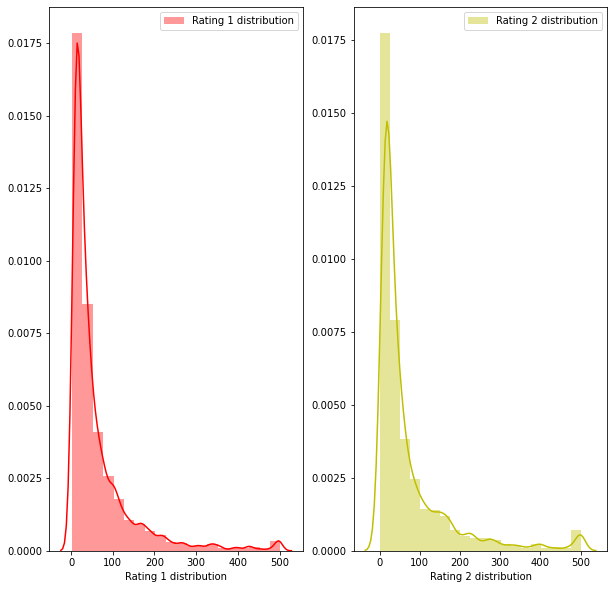

In [26]:
# distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

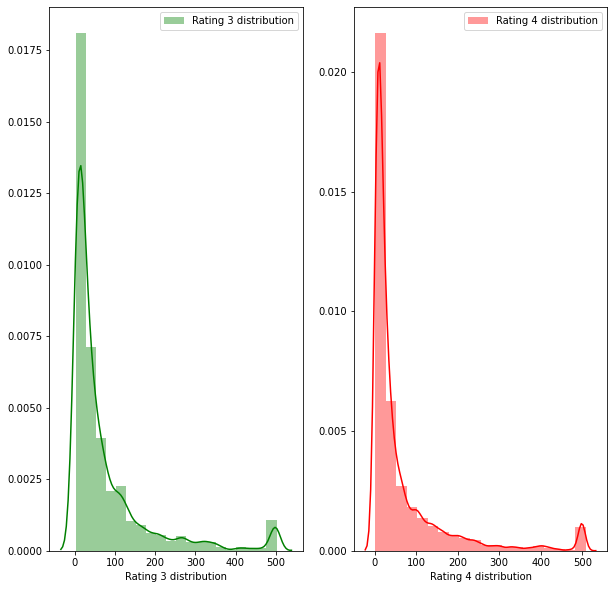

In [27]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

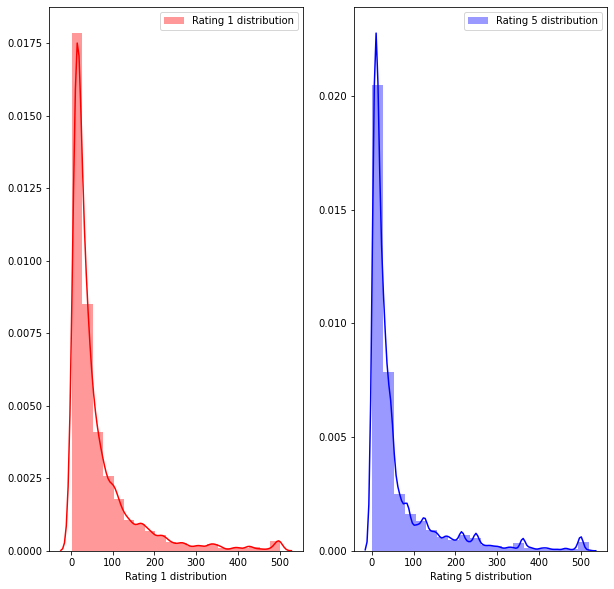

In [28]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

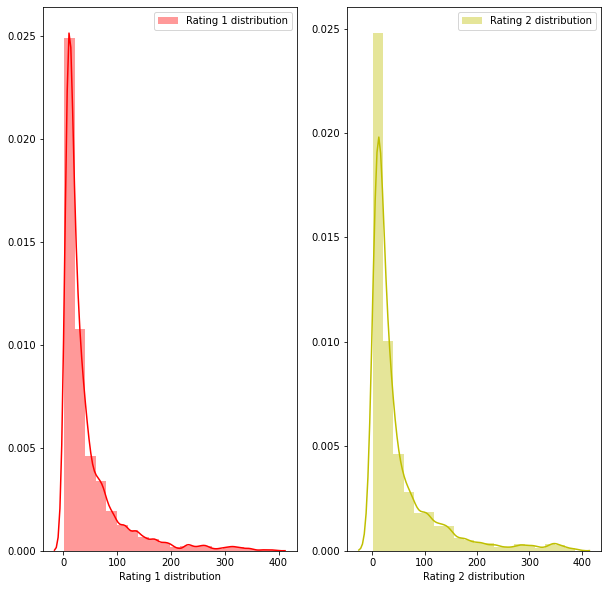

In [29]:
# distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

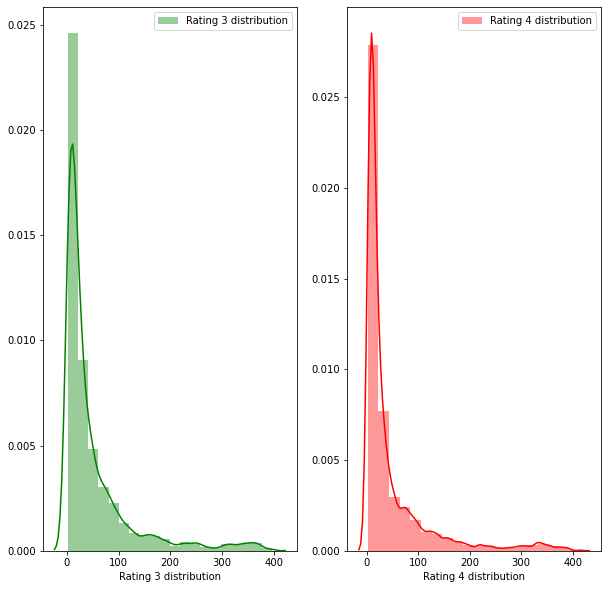

In [30]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

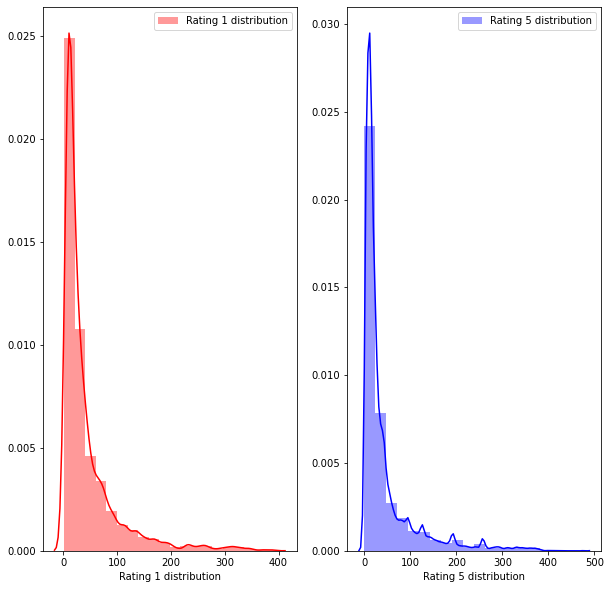

In [31]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

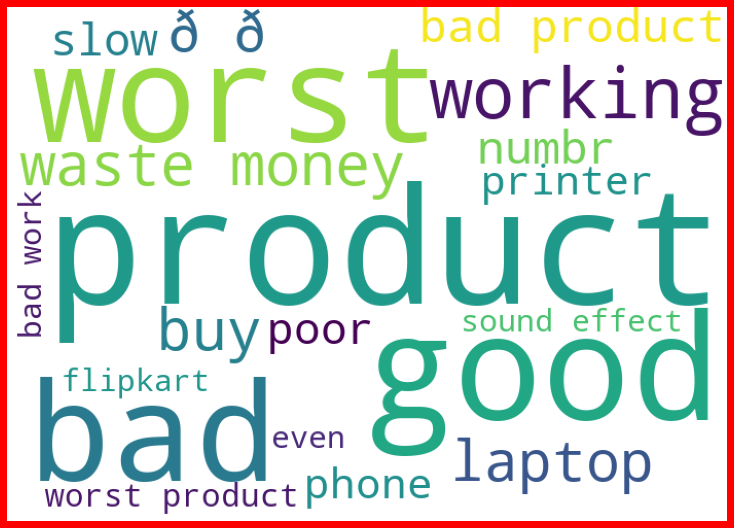

In [32]:
#getting sense of review Loud words in Rating 1
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Rating1=df['Full_review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

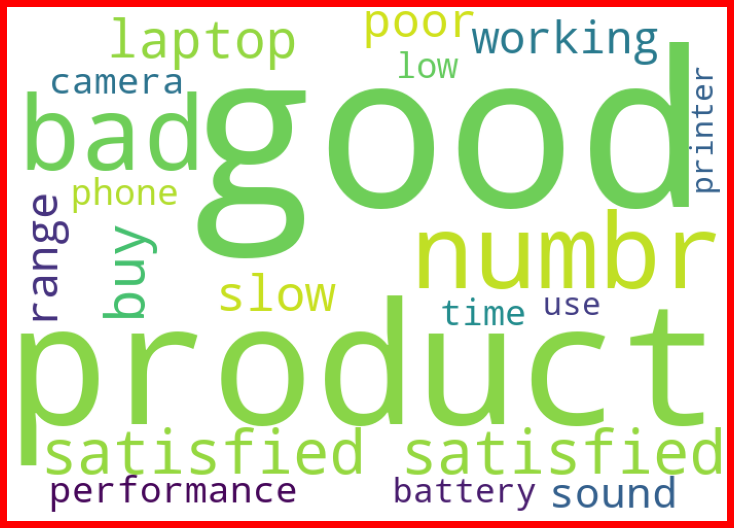

In [33]:
#getting sense of review Loud words in Rating 2

Rating2=df['Full_review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

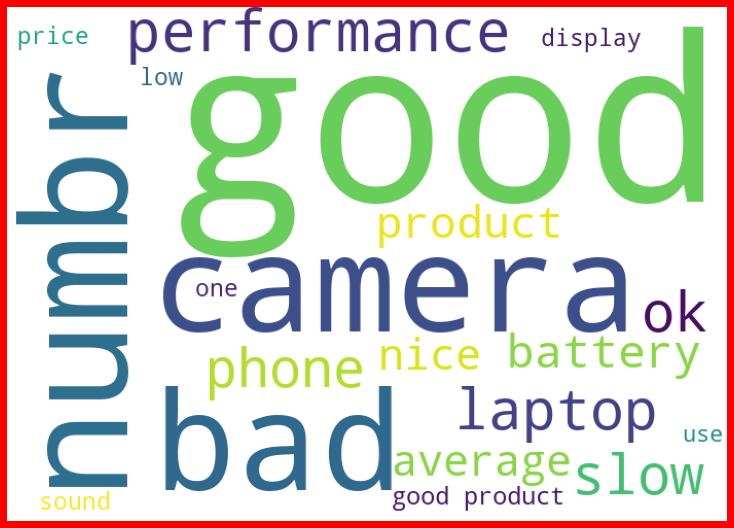

In [34]:
#getting sense of review Loud words in Rating 3

Rating3=df['Full_review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

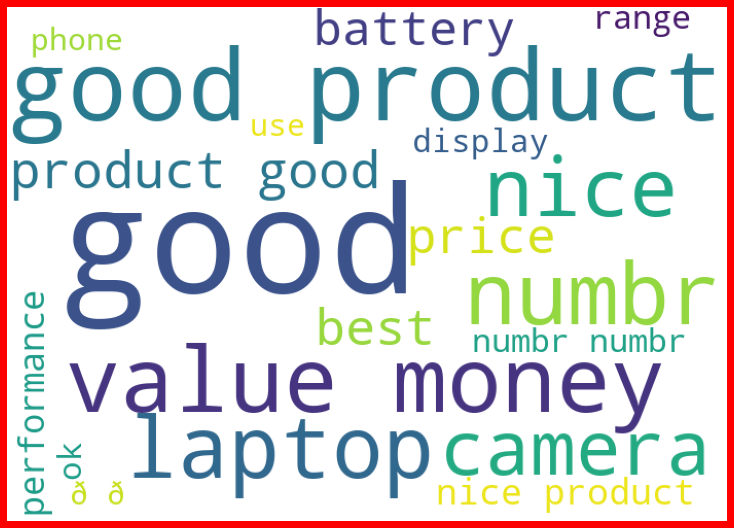

In [35]:
#getting sense of review Loud words in Rating 4

Rating4=df['Full_review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

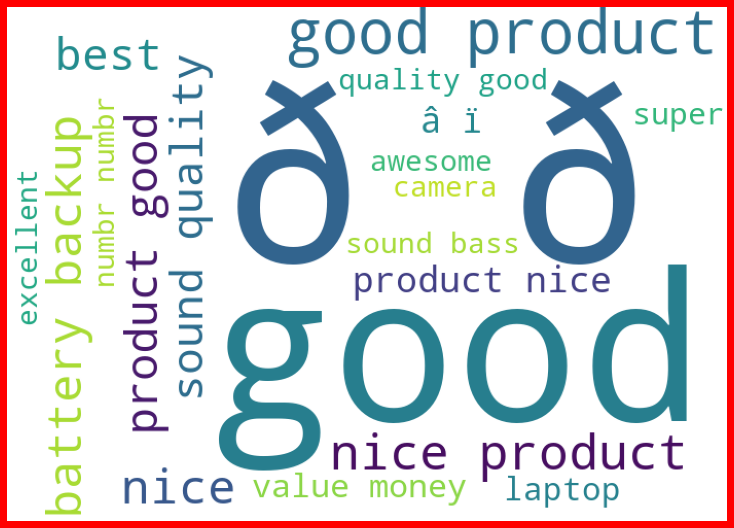

In [36]:
#getting sense of review Loud words in Rating 5

Rating5=df['Full_review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(df['Full_review'])

In [38]:
x=feature1

In [39]:
x

<22402x8114 sparse matrix of type '<class 'numpy.float64'>'
	with 140644 stored elements in Compressed Sparse Row format>

In [40]:
y=df['Ratings']

In [41]:
y

0        5
1        5
2        5
3        4
4        4
        ..
22397    5
22398    1
22399    5
22400    5
22401    5
Name: Ratings, Length: 22402, dtype: int64

In [42]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [43]:
#handling imbalanced data through smote technique
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy = {1: 20000, 2: 20000, 3: 20000, 4: 20000, 5: 20000})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 9491, 4: 3350, 1: 2606, 3: 1607, 2: 867})
The number of classes after fit Counter({5: 19927, 1: 19903, 4: 19864, 2: 19859, 3: 19821})


In [44]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [45]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [46]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.4664137469314885


Cross_Val_Score =  0.553572623828648


classification_report
               precision    recall  f1-score   support

           1       0.64      0.43      0.51       700
           2       0.19      0.22      0.21       248
           3       0.24      0.21      0.22       366
           4       0.26      0.48      0.34       840
           5       0.68      0.54      0.60      2327

    accuracy                           0.47      4481
   macro avg       0.40      0.38      0.38      4481
weighted avg       0.53      0.47      0.48      4481



[[ 299  117   48  113  123]
 [  45   55   28   69   51]
 [  21   29   78  134  104]
 [  26   24   61  406  323]
 [  76   61  116  822 1252]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeCla

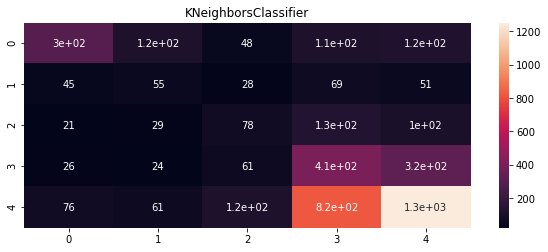

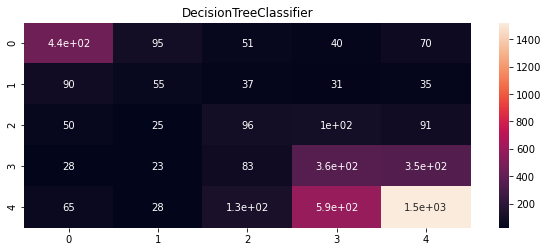

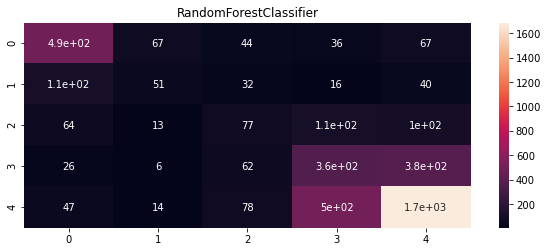

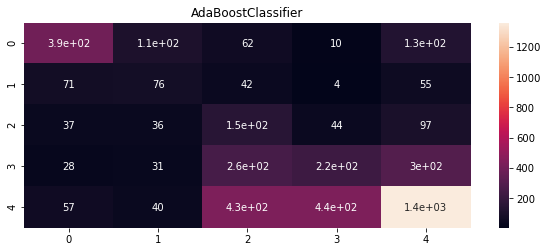

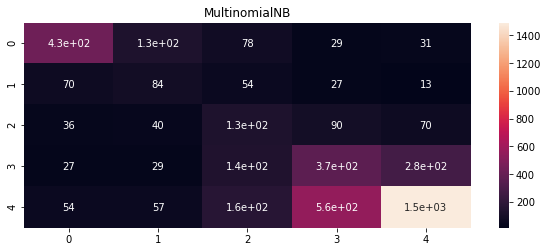

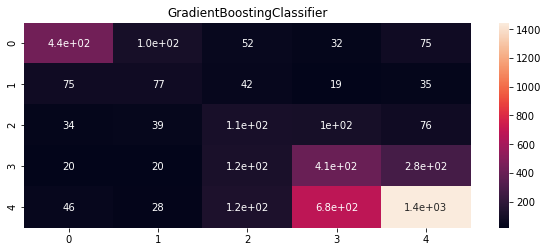

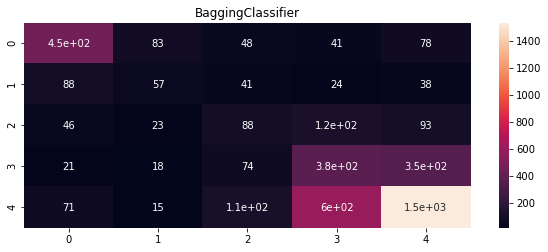

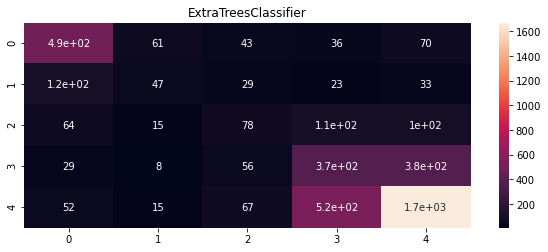

In [47]:

Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [48]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,46.641375,55.357262
1,DecisionTreeClassifier,55.233207,58.187191
2,RandomForestClassifier,59.384066,62.811540
3,AdaBoostClassifier,49.163133,61.106248
4,MultinomialNB,55.902700,61.329461
5,GradientBoostingClassifier,55.255523,61.896507
6,BaggingClassifier,55.880384,60.856485
7,ExtraTreesClassifier,59.294800,62.351756


# Using gridsearch cv to find the best parameters in random forest

In [49]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.5911626869002454
[[ 488   72   40   32   68]
 [ 111   47   32   25   33]
 [  57   15   87  113   94]
 [  27    7   68  380  358]
 [  50   12   67  551 1647]]
              precision    recall  f1-score   support

           1       0.67      0.70      0.68       700
           2       0.31      0.19      0.23       248
           3       0.30      0.24      0.26       366
           4       0.35      0.45      0.39       840
           5       0.75      0.71      0.73      2327

    accuracy                           0.59      4481
   macro avg       0.47      0.46      0.46      4481
weighted avg       0.60      0.59      0.59      4481



In [50]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,46.641375,55.357262
1,DecisionTreeClassifier,55.233207,58.187191
2,RandomForestClassifier,59.384066,62.811540
3,AdaBoostClassifier,49.163133,61.106248
4,MultinomialNB,55.902700,61.329461
5,GradientBoostingClassifier,55.255523,61.896507
6,BaggingClassifier,55.880384,60.856485
7,ExtraTreesClassifier,59.294800,62.351756


# Random forest classifier is giving us best results so we save it as our final model.

In [51]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

['Ratings_prediction.csv']

In [52]:
model=joblib.load('Ratings_prediction.csv')

In [53]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[1 5 5 5 5 4 5 3 2 5 5 5 5 4 5 1 5 5 5 5 5 5 3 2 1 4 4 4 2 5 5 3 5 5 5 1 4
 5 5 4 5 5 5 1 5 5 5 5 1 5 5 5 5 5 5 5 4 5 5 5 1 3 4 4 4 4 5 4 4 4 1 3 4 5
 4 5 5 5 4 4 4 5 1 5 5 1 1 5 5 4 5 5 4 1 5 2 5 4 3 5 4 4 5 5 5 4 4 3 3 1 5
 1 5 3 4 3 5 1 5 5 5 5 4 5 5 4 4 5 5 5 3 4 5 4 2 4 4 4 3 4 1 5 4 5 4 4 1 3
 5 5 1 4 5 4 1 1 1 5 5 5 2 5 5 5 4 3 4 4 5 4 5 4 1 4 5 4 4 4 4 4 1 5 4 1 5
 5 5 5 5 4 2 5 5 5 4 5 5 1 5 5 5 5 4 5 5 3 5 5 4 5 5 5 1 5 1 1 5 3 5 3 5 2
 5 4 5 5 3 5 4 5 4 1 5 4 1 5 5 4 4 4 5 5 5 4 4 4 4 3 4 4 5 4 5 5 5 4 5 1 3
 1 5 5 5 4 1 1 1 5 5 5 5 5 5 4 4 5 5 5 5 5 4 1 4 1 5 5 5 5 5 4 5 5 1 5 4 5
 4 5 4 4 5 5 5 5 5 5 5 5 5 5 4 5 1 5 4 1 1 1 1 5 1 5 4 4 5 2 1 3 4 1 5 5 5
 5 5 2 1 2 5 5 5 4 3 5 5 5 5 5 5 1 5 4 4 5 1 4 4 1 2 1 3 4 1 5 1 2 4 3 4 1
 5 4 1 5 5 4 4 4 1 4 5 4 3 4 1 5 5 4 5 4 5 1 5 3 4 5 4 1 4 5 4 5 5 5 5 1 4
 5 1 4 5 4 5 3 5 3 5 5 5 4 5 3 4 1 4 3 4 1 5 5 1 1 4 1 4 5 1 5 5 5 1 1 1 5
 5 5 5 4 5 5 1 4 4 5 5 5 5 3 4 5 5 4 1 1 4 4 4 3 1 4 2 1 5 4 3 5 4 5 1 4 5
 4 4 1 5 5 5 4 4 4 5 1 5 